In [1]:
import numpy as np
from sklearn.datasets import make_blobs

In [2]:
class KMeans:
    def __init__(self, n_clusters, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iters):
            # Assign each data point to the nearest centroid
            labels = self._assign_labels(X)
            
            # Update centroids
            new_centroids = self._update_centroids(X, labels)
            
            # Check for convergence
            if np.all(self.centroids == new_centroids):
                break
                
            self.centroids = new_centroids

    def _assign_labels(self, X):
        # Compute distances from each data point to centroids
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        
        # Assign labels based on the nearest centroid
        return np.argmin(distances, axis=1)
    
    def _update_centroids(self, X, labels):
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return new_centroids

In [3]:
# Generate synthetic data using sklearn.datasets.make_blobs
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

In [4]:
# Create a K-Means instance with 3 clusters
kmeans = KMeans(n_clusters=3)

In [5]:
# Fit the model to the data
kmeans.fit(X)


In [6]:
# Get cluster assignments for each data point
labels = kmeans._assign_labels(X)


In [7]:
print("Cluster Assignments:", labels)
print("Final Centroids:", kmeans.centroids)

Cluster Assignments: [0 0 2 1 0 1 2 1 2 2 2 1 2 2 0 2 0 1 2 2 2 2 1 0 2 0 0 1 1 2 2 2 0 2 0 2 0
 1 0 1 1 2 0 1 2 2 0 1 0 1 1 0 0 2 0 1 0 2 1 2 0 1 1 0 0 1 1 0 0 2 1 0 0 2
 2 0 0 1 2 1 2 2 0 2 1 0 0 2 1 2 0 2 0 2 2 0 0 2 0 0 1 2 1 2 2 2 2 2 1 0 1
 2 2 2 2 1 0 1 0 1 1 1 2 0 0 0 0 2 0 0 2 2 2 2 2 1 1 0 2 0 2 2 0 2 1 1 1 2
 1 2 2 0 1 0 2 1 1 0 0 2 2 0 0 0 2 0 1 2 2 2 2 2 1 2 1 1 1 2 1 1 0 2 0 1 1
 0 1 2 1 1 0 0 1 0 1 1 1 1 2 0 2 2 1 1 2 1 0 0 1 2 2 0 1 1 0 0 0 0 2 0 0 1
 0 0 2 1 0 0 1 2 2 0 2 0 1 1 0 1 0 0 0 1 1 2 0 1 1 1 0 1 0 1 0 1 1 0 1 2 0
 2 2 2 0 2 1 1 0 1 1 2 2 1 1 1 0 0 0 2 2 2 1 1 1 1 0 1 0 1 1 0 2 1 1 2 0 2
 1 2 0 0]
Final Centroids: [[-6.88387179 -6.98398415]
 [ 4.74710337  2.01059427]
 [-2.63323268  9.04356978]]


## Implementation using sklearn

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load the dataset
customer_data = pd.read_csv("Mall_Customers.csv")

#read the data
customer_data.head()

#check for null or missing values
customer_data.isna().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

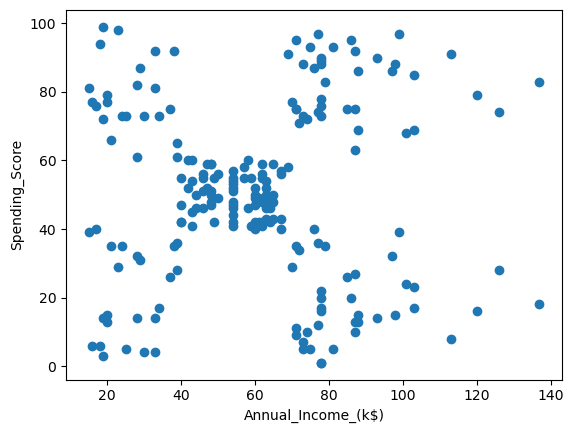

In [38]:
plt.scatter(customer_data['Annual_Income_(k$)'],customer_data['Spending_Score'])
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

In [39]:
from sklearn.cluster import KMeans
km_sample = KMeans(n_clusters=3)
km_sample.fit(customer_data[['Annual_Income_(k$)','Spending_Score']])


d:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

<Axes: xlabel='Annual_Income_(k$)', ylabel='Spending_Score'>

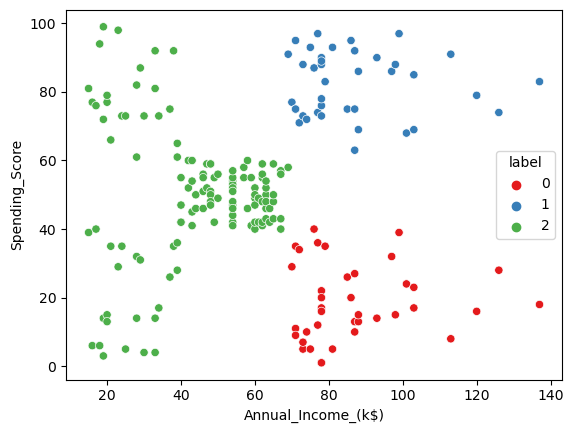

In [42]:
import seaborn as sns
labels_sample = km_sample.labels_
customer_data['label'] = labels_sample

sns.scatterplot(data=customer_data, x='Annual_Income_(k$)', y='Spending_Score', hue='label', palette='Set1')


In [43]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

# k means determine k
distortions = []
K = range(1,10)
for k in K:
   kmeanModel = KMeans(n_clusters=k).fit(X)
   kmeanModel.fit(X)
   distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

d:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\A

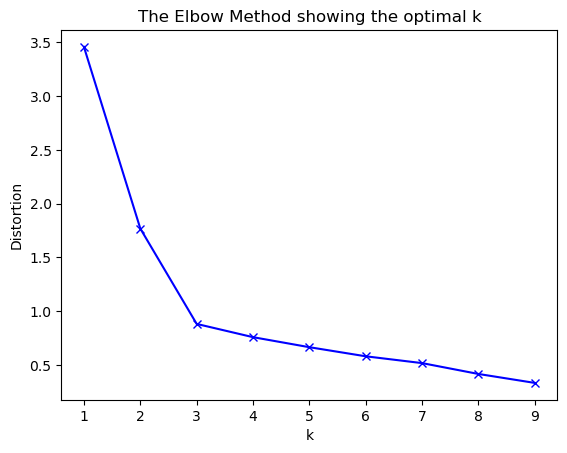

In [44]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [45]:
from sklearn.metrics import silhouette_score

sil_avg = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for k in range_n_clusters:
 kmeans = KMeans(n_clusters = k).fit(X)
 labels = kmeans.labels_
 sil_avg.append(silhouette_score(X, labels, metric = 'euclidean'))

d:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\A

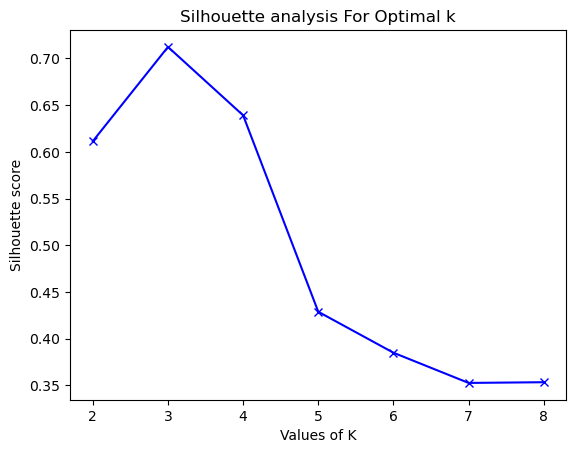

In [46]:
plt.plot(range_n_clusters,sil_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()